# Anime Recommendation System

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import os

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
df= pd.read_csv('data/anime-database-2022/Anime.csv')

In [4]:
df.shape

(21460, 28)

In [5]:
df.head(3)

,ID,Title,Synonyms,Japanese,English,Synopsis,Type,Episodes,Status,Start_Aired,...,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
0,16498,Shingeki no Kyojin,"AoT, SnK",進撃の巨人,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,25.00,Finished Airing,"Apr 7, 2013",...,"Gore, Military, Survival",Shounen,24.00,R - 17+ (violence & profanity),8.53,519803.00,1002.00,1,3524109,155695
1,1535,Death Note,DN,デスノート,Death Note,"Brutal murders, petty thefts, and senseless vi...",TV,37.00,Finished Airing,"Oct 4, 2006",...,Psychological,Shounen,23.00,R - 17+ (violence & profanity),8.62,485487.00,732.00,2,3504535,159701
2,5114,Fullmetal Alchemist: Brotherhood,"Hagane no Renkinjutsushi Fullmetal Alchemist, ...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist Brotherhood,After a horrific alchemy experiment goes wrong...,TV,64.00,Finished Airing,"Apr 5, 2009",...,Military,Shounen,24.00,R - 17+ (violence & profanity),9.13,900398.00,12.00,3,2978455,207772


In [6]:
df.isnull().sum()

ID                     0
Title                  0
Synonyms               0
Japanese               0
English                0
Synopsis               0
Type                   0
Episodes             547
Status                 0
Start_Aired            0
End_Aired              0
Premiered              0
Broadcast              0
Producers              0
Licensors              0
Studios                0
Source                 0
Genres                 0
Themes                 0
Demographics           0
Duration_Minutes     599
Rating                 0
Score               6898
Scored_Users        6898
Ranked              1924
Popularity             0
Members                0
Favorites              0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21460 entries, 0 to 21459
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                21460 non-null  int64  
 1   Title             21460 non-null  object 
 2   Synonyms          21460 non-null  object 
 3   Japanese          21460 non-null  object 
 4   English           21460 non-null  object 
 5   Synopsis          21460 non-null  object 
 6   Type              21460 non-null  object 
 7   Episodes          20913 non-null  float64
 8   Status            21460 non-null  object 
 9   Start_Aired       21460 non-null  object 
 10  End_Aired         21460 non-null  object 
 11  Premiered         21460 non-null  object 
 12  Broadcast         21460 non-null  object 
 13  Producers         21460 non-null  object 
 14  Licensors         21460 non-null  object 
 15  Studios           21460 non-null  object 
 16  Source            21460 non-null  object

In [8]:
df.nunique()

ID                  21460
Title               21460
Synonyms            11557
Japanese            20473
English              8897
Synopsis            18505
Type                    7
Episodes              230
Status                  3
Start_Aired          8221
End_Aired            4796
Premiered             238
Broadcast             569
Producers            4158
Licensors             261
Studios              1424
Source                 17
Genres                926
Themes                736
Demographics           10
Duration_Minutes      152
Rating                  7
Score                 559
Scored_Users         7962
Ranked              19051
Popularity          20275
Members             10594
Favorites            1722
dtype: int64

In [9]:
df.describe()

,ID,Episodes,Duration_Minutes,Score,Scored_Users,Ranked,Popularity,Members,Favorites
count,21460.00,20913.00,20861.00,14562.00,14562.00,19536.00,21460.00,21460.00,21460.00
mean,26458.58,13.27,23.93,6.42,26507.17,97795.21,10743.10,39265.96,462.21
std,17100.48,48.79,24.68,0.91,84989.50,56485.38,6204.69,156635.91,4411.93
min,1.00,1.00,1.00,1.84,101.00,12.00,1.00,6.00,0.00
25%,8454.75,1.00,5.00,5.79,418.00,48879.50,5369.75,291.00,0.00
50%,31004.50,2.00,22.00,6.43,1876.50,97777.00,10741.50,1582.50,2.00
75%,40495.25,12.00,26.00,7.08,11406.50,146714.50,16119.25,11585.50,23.00
max,53094.00,3057.00,168.00,9.13,997243.00,195632.00,21490.00,3524109.00,207772.00


In [10]:
df['Start_Year'] = df['Start_Aired'].str.split(',').str[1]


## Correlation HeatMap

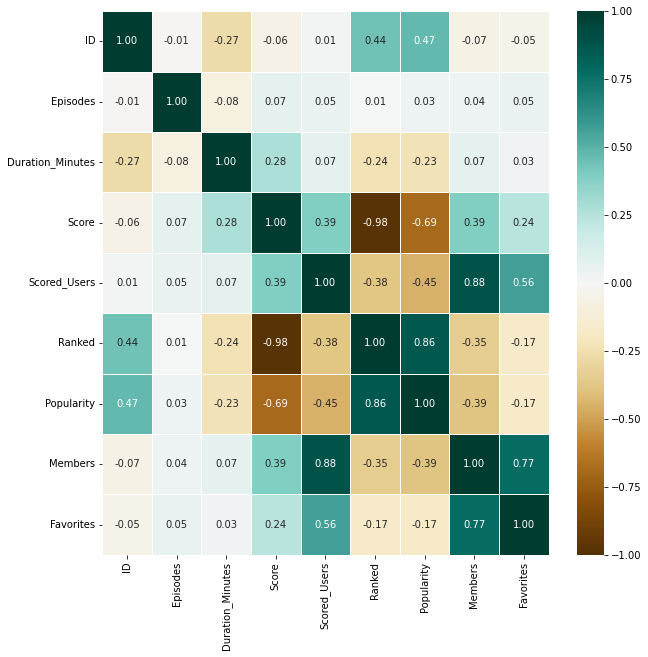

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
corr1   = df.corr()
sns.heatmap(corr1, ax=ax, annot=True, cmap='BrBG', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)
None

## Outlier

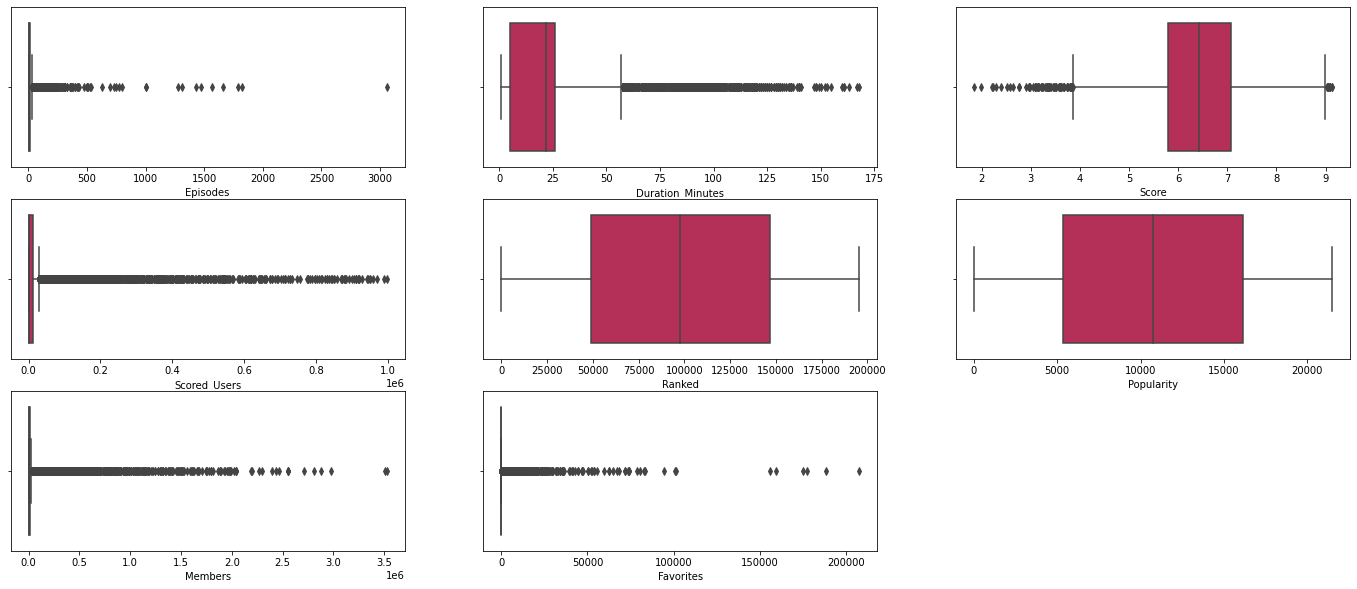

In [12]:
df_box_plot=df[['Episodes', 'Duration_Minutes' ,'Score' ,'Scored_Users' ,'Ranked' ,'Popularity' ,'Members' ,'Favorites']]

i = 1
plt.figure(figsize=(24, 10))
for feature in df_box_plot.columns:
    plt.subplot(3, 3, i)
    sns.boxplot(x=df_box_plot[feature], palette="rocket_r")
    i += 1

## Count Categorik Value

In [13]:
#Count Plot Graphic
def count_plot(data,x,y): 
    plt.figure(figsize=(x,y))
    ax = sns.countplot(x=data, palette= "crest_r" , edgecolor='white', linewidth=1, order=data.value_counts().index)
    plt.xticks(rotation=90)    
    for c in ax.containers:
        ax.bar_label(c, fmt='%.0f', label_type='edge')
    None
    

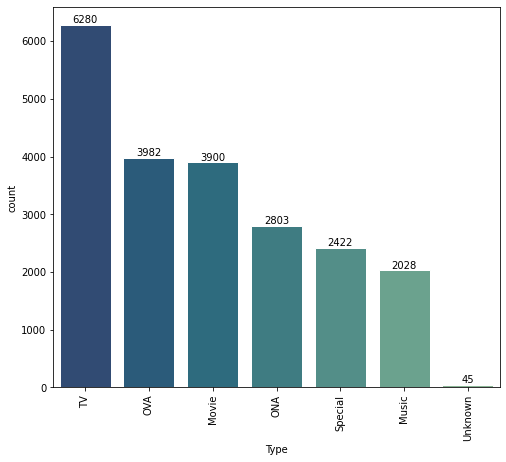

In [14]:
count_plot(df['Type'] ,8,7)


## Count Movie Rating

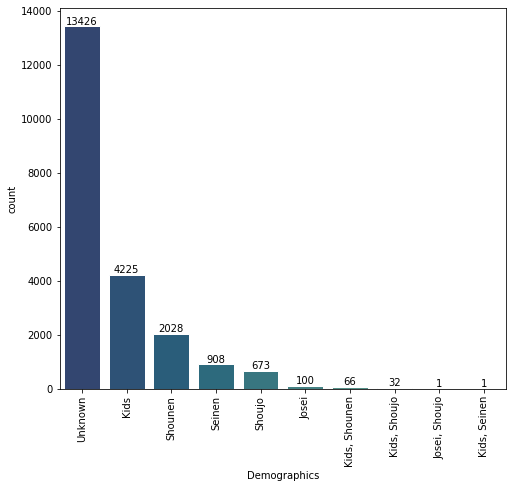

In [15]:
count_plot(df['Demographics'],8,7)

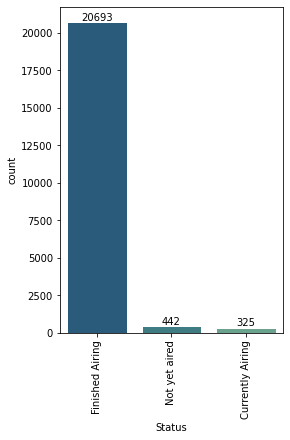

In [16]:
count_plot(df['Status'],4,6)

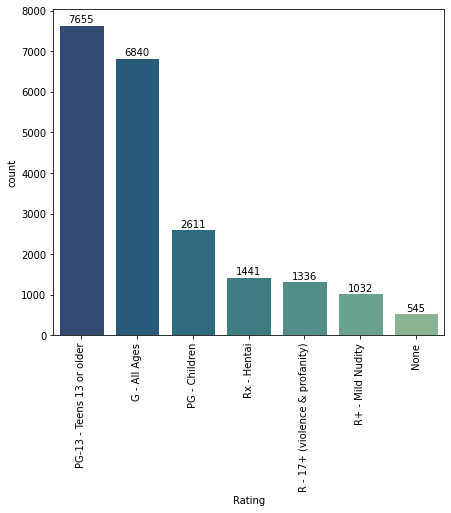

In [17]:
count_plot(df['Rating'],7,6)

## Top 10 Score Movie

In [18]:
def top_10_vis(data, title):
    
    fig , ax =plt.subplots(figsize=(8,8))
    dfx = df.sort_values(by=data , ascending=False)[0:10]    
    sns.set_style({'axes.grid': False, 'font.family':'monospace','font.monospace' :'Times New Roman'})
    sns.despine(offset=20,)
    ax=sns.barplot(data=dfx, y="Title", x=data, palette="crest_r" )
    plt.title(title, fontsize=18 ,y=1.05)
    plt.ylabel('The name of the movie', fontsize=16)
    plt.xlabel(data, fontsize=16)
    for c in ax.containers:
        ax.bar_label(c, fmt='%.02f',label_type='center', 
                     padding=10, rotation=0 ,color='white',)    
    None


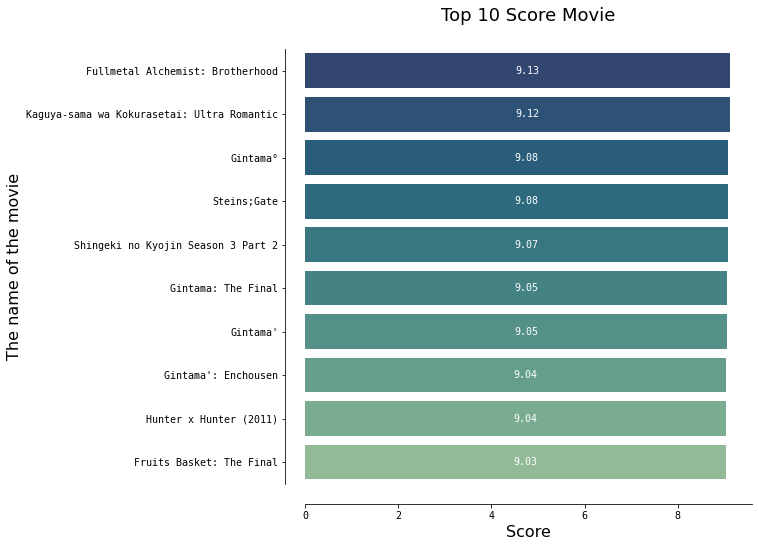

In [19]:
top_10_vis('Score','Top 10 Score Movie')

## Top 10 Members Movie

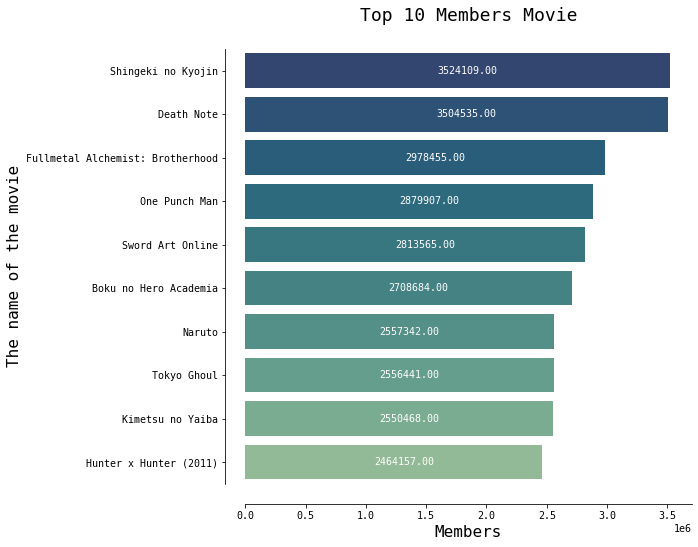

In [20]:
top_10_vis('Members','Top 10 Members Movie' )

## Top 10 Favorites Movie

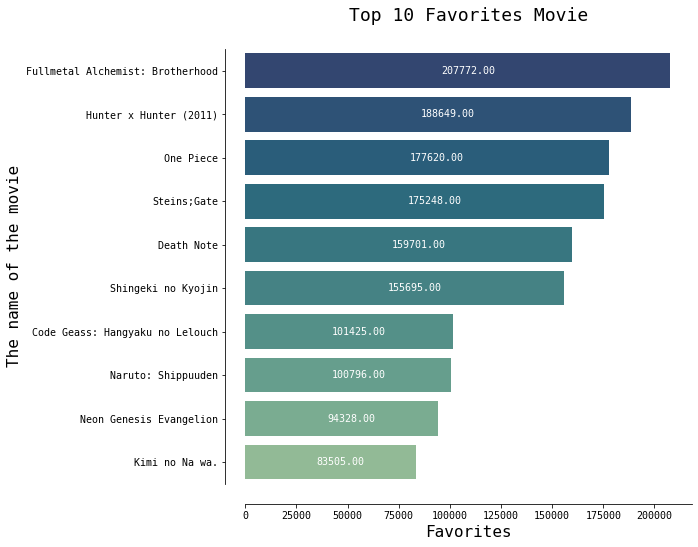

In [21]:
top_10_vis('Favorites','Top 10 Favorites Movie' )

## Top 10 Popularity Movie

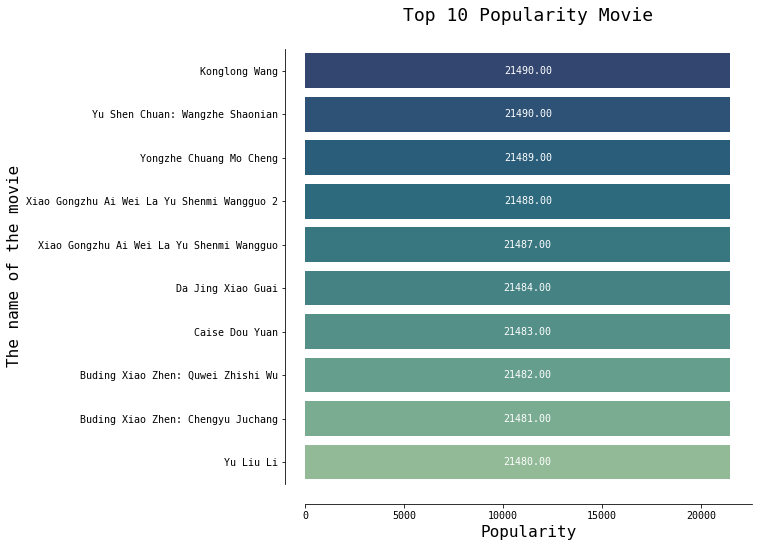

In [22]:
top_10_vis('Popularity','Top 10 Popularity Movie' )

## Top 10 Episodes Movie

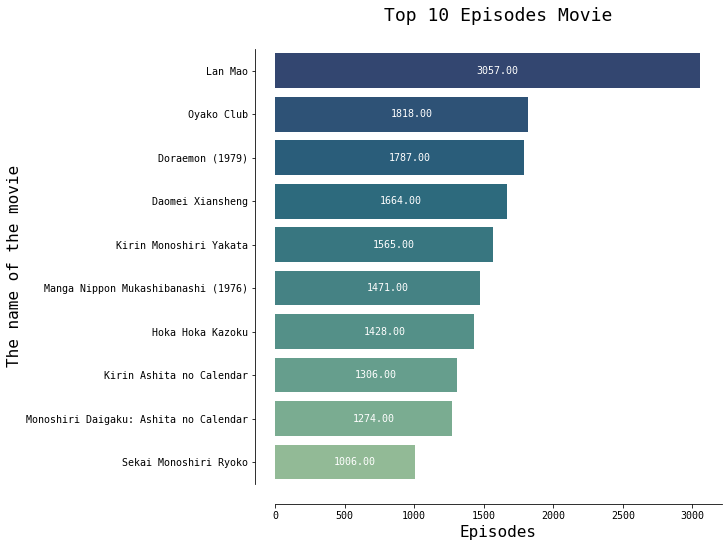

In [23]:
top_10_vis('Episodes','Top 10 Episodes Movie' )

## Top 10 the anime started year count

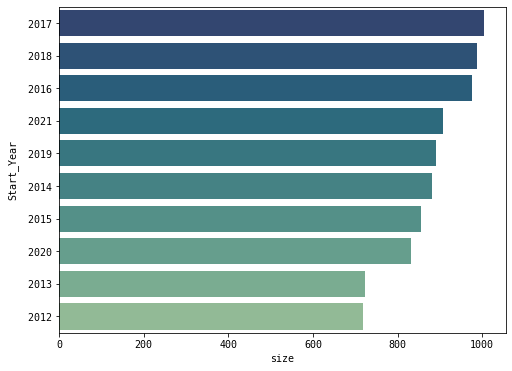

In [24]:
dy = df.groupby(['Start_Year'],as_index=False).size().sort_values(by='size', ascending=False)[:10]
plt.figure(figsize=(8, 6))
sns.barplot(data=dy,y='Start_Year', x='size' , palette='crest_r')
None

## Start Yearly Score Average

In [25]:
def line_plot(data, title ,xlabel, ylabel):
    plt.figure(figsize=(18, 8))
    sns.lineplot(data=data , palette="crest", linewidth=3.0)
    plt.title(title, fontsize=16)
    plt.ylabel(ylabel, size=16)
    plt.xlabel(xlabel, size=18)
    plt.xticks(rotation=90)


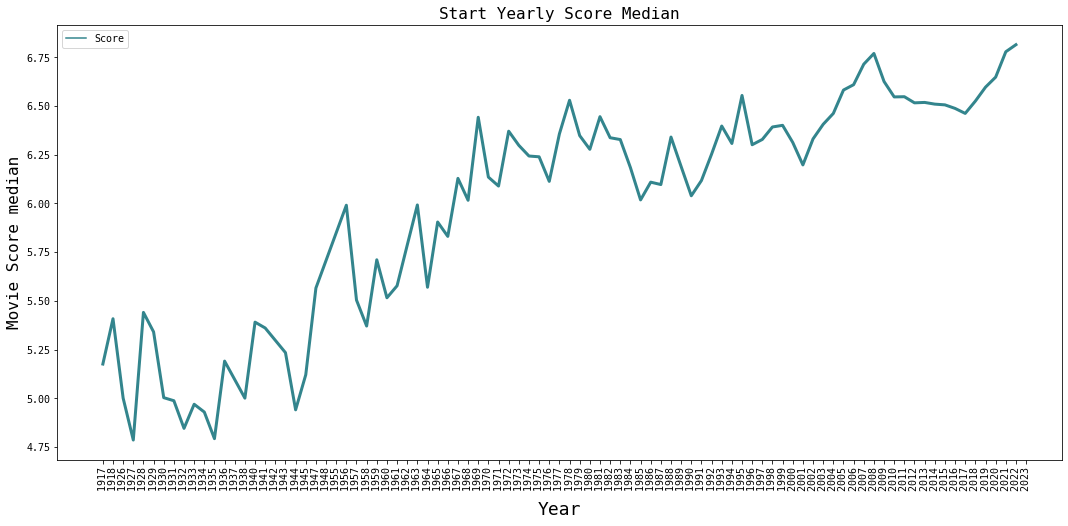

In [26]:
df_year_rating = df.groupby(['Start_Year'])[['Score']].mean()
line_plot(df_year_rating,'Start Yearly Score Median', 'Year', "Movie Score median")

## Parallel coordinates chart

In [27]:
df['Start_Year'] = pd.to_numeric(df['Start_Year'])

In [28]:
df_p=df[['Start_Year','Score','Members','Scored_Users','Ranked','Duration_Minutes', 'Popularity','Episodes',  'Favorites'  ]]

In [29]:
fig = px.parallel_coordinates(df_p, color  = 'Score',                                                               
                                  color_continuous_scale    = px.colors.diverging.BrBG,
                                  color_continuous_midpoint = 5,)
fig.show()

## Themes Analysis

In [30]:
df['Themes']= df['Themes'].str.replace(' ','')

# Themes columns get dummies
gd_df_x = df['Themes'].str.get_dummies(sep=',')
df      = pd.concat([gd_df_x, df], axis=1, join='inner')

#Genre columns
data = df.iloc[:, 0:51]
df_x = pd.DataFrame(data.sum(), columns=['count'])
df_x.sort_values(by='count', ascending=True, inplace=True)

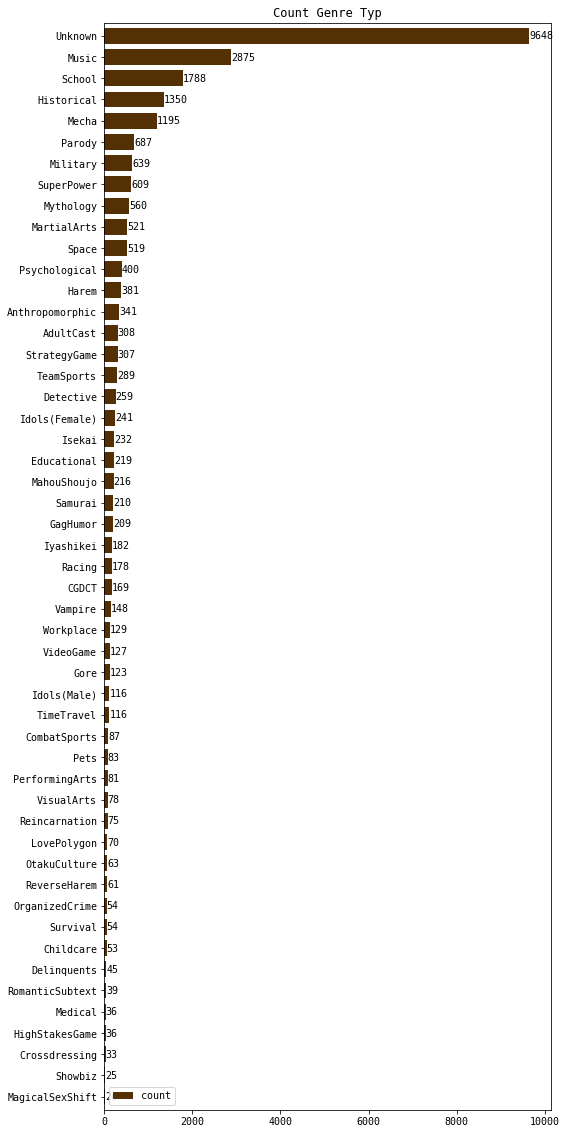

In [31]:
ax   = df_x.plot(kind='barh', cmap='BrBG' , figsize=(8,20) ,title= 'Count Genre Typ' ,width=.75)
for c in ax.containers:
        # set the bar label
    ax.bar_label(c, fmt='%.0f', label_type='edge')

## Average Score vs. Themes

In [32]:
# Filter Genre and Worldwide LT Gross column
gen_df = df[["Themes", "Score", 'Duration_Minutes']]
gen_df = gen_df.dropna(how="any", axis=0)
gen_df["Themes"] = gen_df["Themes"].str.split(",")
gen_df = gen_df.explode("Themes")

# Get the median group by Genre
gen_df = gen_df.groupby(["Themes"]).median()["Score"].sort_values(ascending=False)
gen_df = pd.DataFrame({"Themes": gen_df.index,  "Score": gen_df.values})[:10]

# Create Label column used for visualization
gen_df["Label"] = gen_df.apply(lambda row: (round(row["Score"], 2)), axis=1)

# Show the chart
fig = px.bar(gen_df,
             width =800, height=500, 
             x     ="Score", y="Themes", 
             title ="Score vs. Themes", text="Label", color="Score",  color_continuous_scale='BrBG')

fig.show()

# Duration_Minutes vs. Score

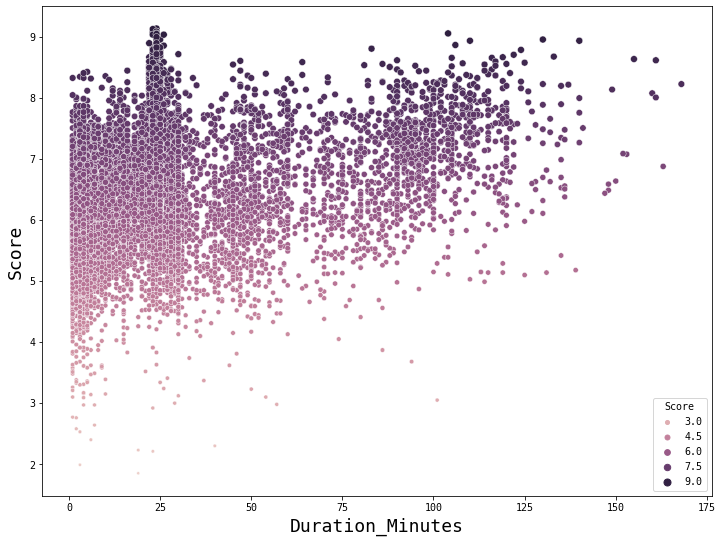

In [33]:
plt.figure(figsize=(12,9))
sns.scatterplot(data=df, x ="Duration_Minutes", 
                         y ="Score", hue="Score", size="Score", sizes=(10, 50))
plt.xlabel("Duration_Minutes", size=18)
plt.ylabel("Score", size=18)
None